<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/Cifar100(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.backend import conv2d
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

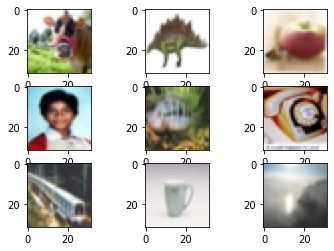

In [8]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

In [9]:
x_train = x_train.astype('float32')   
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_train))
print(np.shape(y_test))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


In [10]:
#Tạo mô hình CNN
model=Sequential()
#Block 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same',input_shape=(32,32,3)))
 #32 sau conv2d là số lần học vs kích thước 3x3 của kernel, input shape là 32x32, 3 kênh màu
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
#Block 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer = 'he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
391/391 [==============================] - 7s 15ms/step - loss: 4.2143 - accuracy: 0.0596 - val_loss: 3.7791 - val_accuracy: 0.1320
Epoch 2/100
391/391 [==============================] - 5s 14ms/step - loss: 3.5168 - accuracy: 0.1637 - val_loss: 3.3348 - val_accuracy: 0.2019
Epoch 3/100
391/391 [==============================] - 6s 14ms/step - loss: 3.0990 - accuracy: 0.2381 - val_loss: 2.9824 - val_accuracy: 0.2659
Epoch 4/100
391/391 [==============================] - 5s 14ms/step - loss: 2.7884 - accuracy: 0.2985 - val_loss: 2.8743 - val_accuracy: 0.2897
Epoch 5/100
391/391 [==============================] - 6s 14ms/step - loss: 2.5169 - accuracy: 0.3510 - val_loss: 2.6806 - val_accuracy: 0.3203
Epoch 6/100
391/391 [==============================] - 6s 14ms/step - loss: 2.2874 - accuracy: 0.3993 - val_loss: 2.4800 - val_accuracy: 0.3670
Epoch 7/100
391/391 [==============================] - 5s 14ms/step - loss: 2.0959 - accuracy: 0.4422 - val_loss: 2.4645 - val_accuracy:

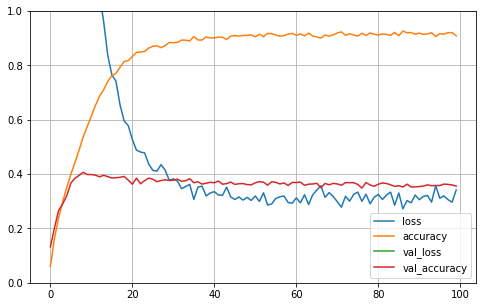

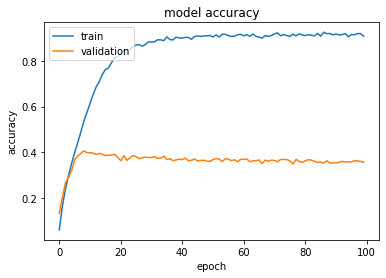

In [11]:
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

opt=SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test),verbose=1)
#Ve Do Thi
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()